In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

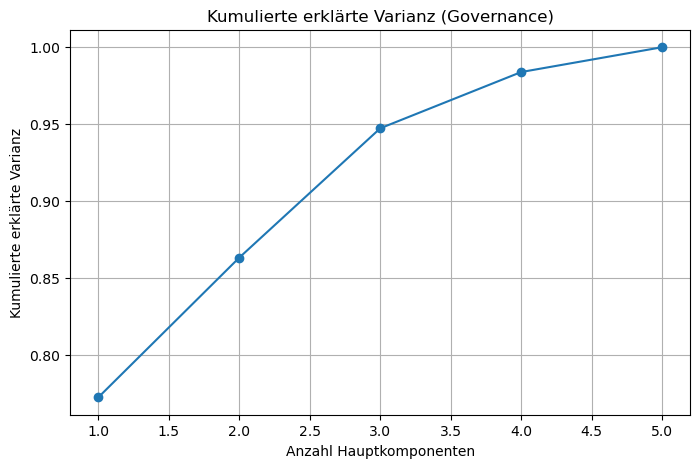

🧭 Komponenten-Zusammensetzung:


,va,pv,ge,rl,cc
PC1,0.416407,0.405699,0.457894,0.483493,0.467527
PC2,0.459175,0.659353,-0.468346,-0.300260,-0.211915
PC3,0.719535,-0.629128,-0.235578,-0.035386,0.172388
PC4,-0.301937,0.067621,-0.501003,-0.098007,0.802279
PC5,-0.082869,-0.016932,-0.514280,0.815611,-0.251279


In [2]:


# CSV-Datei laden
df = pd.read_csv("NEWmergedpop.csv")

#  Governance-Variablen definieren
governance_vars = ['va', 'pv', 'ge', 'rl', 'cc']

#  Governance-Daten extrahieren und fehlende Werte entfernen
df_gov = df[governance_vars].dropna()

#  Standardisieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_gov)

#  PCA ausführen
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#  Anteil erklärte Varianz je Komponente
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

#  Grafik erstellen
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.title("Kumulierte erklärte Varianz (Governance)")
plt.xlabel("Anzahl Hauptkomponenten")
plt.ylabel("Kumulierte erklärte Varianz")
plt.grid(True)
plt.savefig("HKA.png", dpi=300)
plt.show()

# Komponenten-Zusammensetzung anzeigen
components_df = pd.DataFrame(pca.components_, columns=governance_vars, index=[f'PC{i+1}' for i in range(len(governance_vars))])
print("🧭 Komponenten-Zusammensetzung:")
display(components_df)


In [ ]:
#Hinzufügen

# CSV-Datei laden
df = pd.read_csv("NEWmergedpop.csv")

# Governance-Variablen definieren
governance_vars = ['va', 'pv', 'ge', 'rl', 'cc']

# Governance-Daten extrahieren und fehlende Werte entfernen
df_gov = df[governance_vars].dropna()

# Standardisieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_gov)

# PCA mit 2 Komponenten
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Neue PCA-Variablen ins Haupt-DataFrame einfügen
df.loc[df_gov.index, 'Gov_PCA1'] = X_pca[:, 0]
df.loc[df_gov.index, 'Gov_PCA2'] = X_pca[:, 1]

#Alte Governance-Variablen optional entfernen
df = df.drop(columns=governance_vars)

# Speichern
df.to_csv("NEWmergedpop_with_PCA.csv", index=False)
print("✅ Datei 'NEWmergedpop_with_PCA.csv' mit Gov_PCA1 und Gov_PCA2 gespeichert.")
